In [17]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/*MIN*.nc'))#*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/subset_MIN_ICE_1m_20020101_20031231.nc']


In [18]:
ptrc=nc.Dataset(nc_filename[0])

lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
dep = ptrc.variables['deptht'][:]
bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]



Dsopt=nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/data_Th_desorption_rate.nc')



minice=nc.Dataset(
    '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/dyn_off/ANHA4-EXH001_ice_y2002m09.nc')
minice=minice.variables['ileadfra'][:]

minice_=nc.Dataset(
    '/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/Cryosphere2d_ANHA4-EXH001_icemod_y2001m09.nc')
minice_=minice_.variables['ileadfra'][:]

In [19]:
nasa=nc.Dataset('/ocean/xiaoxiny/research/\
data/findk/ice_concentration/seaice_conc_monthly_nh_f13_200209_v02r00.nc')

In [20]:
print nasa.variables
nasa_lat=nasa.variables['latitude'][:]
nasa_lon=nasa.variables['longitude'][:]
nasa_ice=nasa.variables['seaice_conc_monthly_cdr'][:]
print nasa_ice.shape,nasa_lat.min(),nasa_lat.max()

OrderedDict([(u'projection', <netCDF4.Variable object at 0x7f2359a2d2b0>), (u'seaice_conc_monthly_cdr', <netCDF4.Variable object at 0x7f2359a2d348>), (u'stdev_of_seaice_conc_monthly_cdr', <netCDF4.Variable object at 0x7f2359a2d3e0>), (u'melt_onset_day_seaice_conc_monthly_cdr', <netCDF4.Variable object at 0x7f2359a2d478>), (u'qa_of_seaice_conc_monthly_cdr', <netCDF4.Variable object at 0x7f2359a2d510>), (u'goddard_merged_seaice_conc_monthly', <netCDF4.Variable object at 0x7f2359a2d5a8>), (u'goddard_nt_seaice_conc_monthly', <netCDF4.Variable object at 0x7f2359a2d640>), (u'goddard_bt_seaice_conc_monthly', <netCDF4.Variable object at 0x7f2359a2d6d8>), (u'time', <netCDF4.Variable object at 0x7f2359a2d770>), (u'ygrid', <netCDF4.Variable object at 0x7f2359a2d808>), (u'xgrid', <netCDF4.Variable object at 0x7f2359a2d8a0>), (u'latitude', <netCDF4.Variable object at 0x7f2359a2d938>), (u'longitude', <netCDF4.Variable object at 0x7f2359a2d9d0>)])
(1, 448, 304) 31.1026717524 89.8368159996


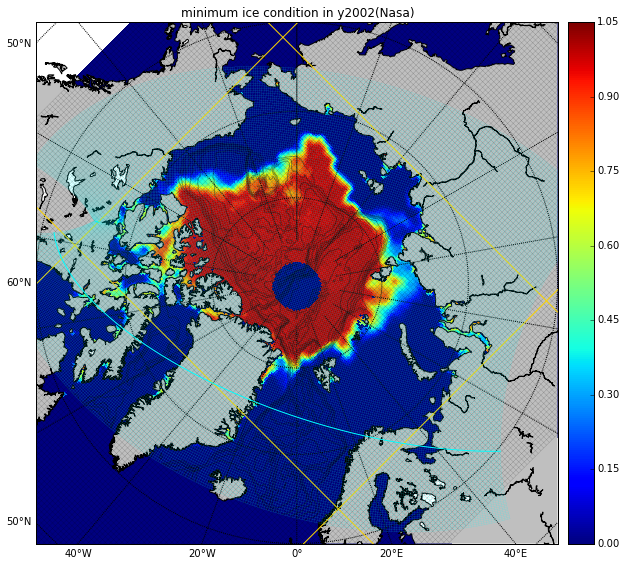

In [21]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],latmax=85)
x,y = m(nasa_lon,nasa_lat)
m.pcolor(x,y,nasa_ice[0,:,:],vmin=0.,vmax=1.05);m.colorbar()
plt.plot(x[::2,::2],y[::2,::2],x[::2,::2].T,y[::2,::2].T,color='k',lw=0.1)

plt.plot(x[150,::2],y[150,::2],color='gold',lw=1)
plt.plot(x[300,::2],y[300,::2],color='gold',lw=1)
plt.plot(x[::2,60],y[::2,60],color='gold',lw=1)
plt.plot(x[::2,250],y[::2,250],color='gold',lw=1)

x_lon,y_lat = m(lon,lat)
plt.plot(x_lon[::2,::2],y_lat[::2,::2],x_lon[::2,::2].T,y_lat[::2,::2].T,color='cyan',lw=0.1)
plt.plot(x_lon[80,::2],y_lat[80,::2],color='cyan',lw=1)
m = m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)

plt.title('minimum ice condition in y2002(Nasa)')

In [22]:
coordinate_name=glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/*coor*.nc')
coordinate_obj=nc.Dataset(coordinate_name[0])
nav_lon=coordinate_obj.variables['nav_lon'][:,:]
nav_lat=coordinate_obj.variables['nav_lat'][:,:]
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
x_lon,y_lat = m(nav_lon, nav_lat)

In [23]:
# method 1 interp.

In [24]:
from scipy import interpolate
x_=x[150:300,60:250]; y_=y[150:300,60:250];nasa_ice_=np.copy(nasa_ice[0,150:300,60:250])
#x_=x_[::2,::2]    ; y_=y_[::2,::2]    ;nasa_ice_=nasa_ice_[::2,::2]


a=np.where( (nasa_lat[150:300,60:250] > 86.85))
#calculate nearby conc.
temp =np.copy(nasa_ice[0,150:300,60:250])
temp[a[0],a[1]] = np.ma.masked
b=np.where((nasa_lat[150:300,60:250] < 86.85) & (nasa_lat[150:300,60:250] > 85) )
avg = np.average(temp[b[0],b[1]] )

nasa_ice_[a[0],a[1]] = avg
print 'nearby avg. ice ',avg

points=np.c_[np.ravel(x_),np.ravel(y_)]
values = np.ravel(nasa_ice_)

from scipy.interpolate import griddata
icon_ = griddata(points, values, (x_lon[400:,:], y_lat[400:,:]), method='nearest')


nearby avg. ice  0.984394


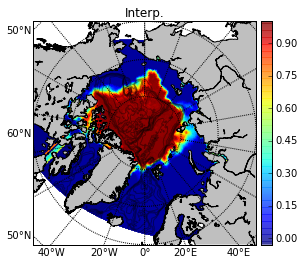

In [25]:
ax= fig.add_subplot()
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
m.drawcoastlines()

m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
m.contour(x_lon[400:,:],y_lat[400:,:],bathy,linewidth=0.075,colors='black',alpha=0.4)
m.pcolor(x_lon[400:,:],y_lat[400:,:],icon_,alpha=0.5);m.colorbar()
plt.title('Interp.')

In [26]:
b=np.where(nav_lat[400:,:]<70)
icon_[b[0],b[1]]=0

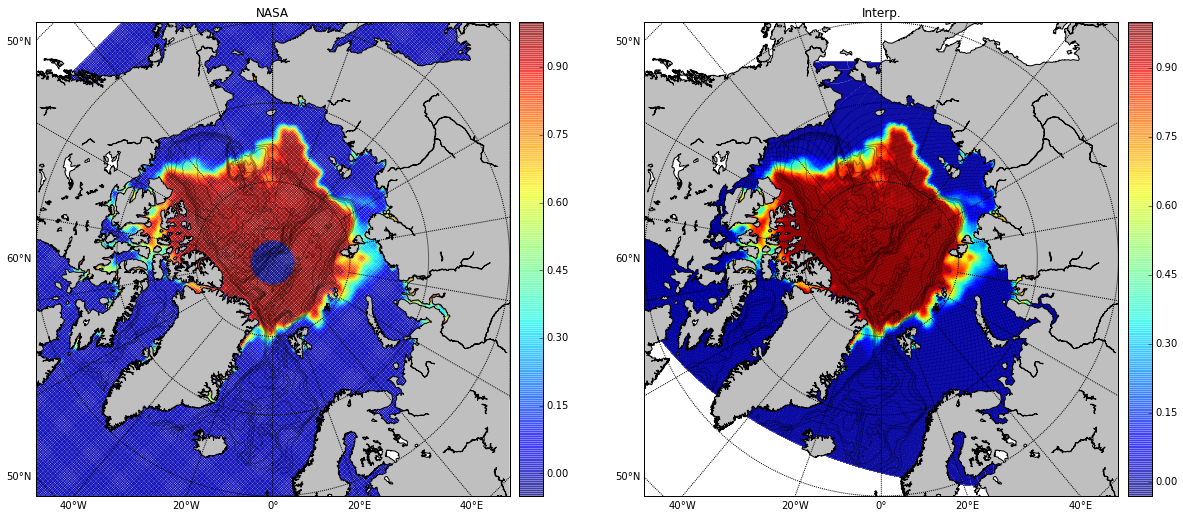

In [27]:
fig = plt.figure(figsize=(20,10))

ax= fig.add_subplot(121)

m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x,y = m(nasa_lon,nasa_lat)
m.contour(x_lon[400:,:],y_lat[400:,:],bathy,linewidth=0.075,colors='black',alpha=0.4)
m.pcolor(x,y,nasa_ice[0,:,:],alpha=0.5);m.colorbar()
plt.title('NASA')


ax= fig.add_subplot(122)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
m.drawcoastlines()

m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
m.contour(x_lon[400:,:],y_lat[400:,:],bathy,linewidth=0.075,colors='black',alpha=0.4)
m.pcolor(x_lon[400:,:],y_lat[400:,:],icon_,alpha=0.5);m.colorbar()
plt.title('Interp.')
#plt.legend(loc=1,fontsize=11,scatterpoints=1)
plt.show()

In [28]:
print icon_.max()

1.0


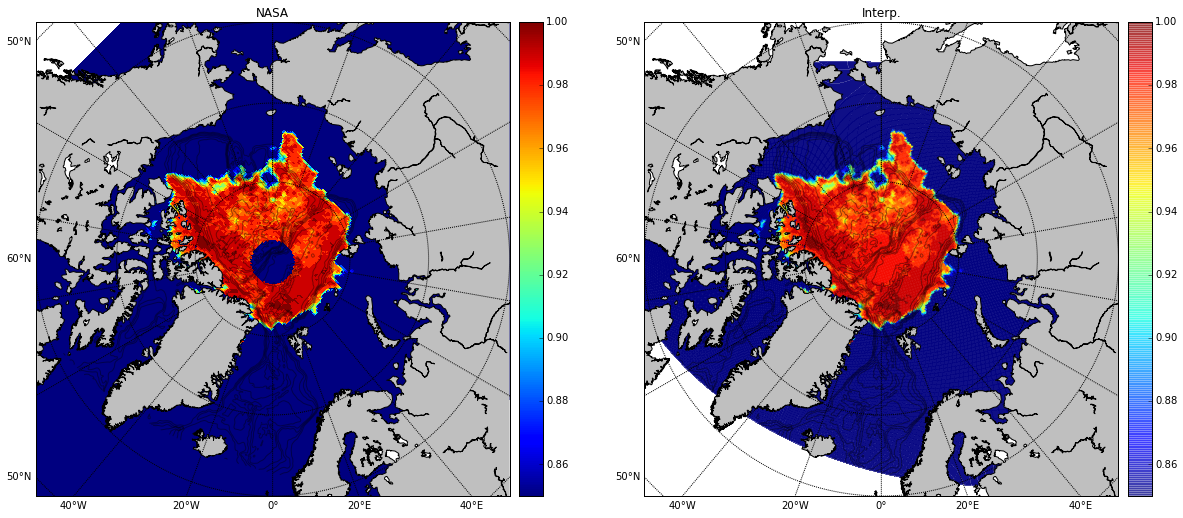

In [29]:
fig = plt.figure(figsize=(20,10))

ax= fig.add_subplot(121)

m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x,y = m(nasa_lon,nasa_lat)
m.contour(x_lon[400:,:],y_lat[400:,:],bathy,linewidth=0.075,colors='black',alpha=0.4)
m.pcolor(x,y,nasa_ice[0,:,:],vmin=0.85,vmax=1.0);m.colorbar()
plt.title('NASA')


ax= fig.add_subplot(122)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l')
m.drawcoastlines()

m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
m.contour(x_lon[400:,:],y_lat[400:,:],bathy,linewidth=0.075,colors='black',alpha=0.4)
m.pcolor(x_lon[400:,:],y_lat[400:,:],icon_,vmin=0.85,vmax=1.0,alpha=0.5);m.colorbar()
plt.title('Interp.')
#plt.legend(loc=1,fontsize=11,scatterpoints=1)
plt.show()

In [30]:
# method 2  (memery problem)

from scipy.interpolate import griddata
from scipy.interpolate import Rbf

rbf = Rbf(x[150:300,60:250], y[150:300,60:250], nasa_ice[0,150:300,60:250], epsilon=2)
icon_ = rbf(x_lon[400:,:], y_lat[400:,:])

icon_[icon_ < 0] = 0

In [31]:
icon_ANHA=np.zeros((800,544))
icon_ANHA[400:,:]=icon_

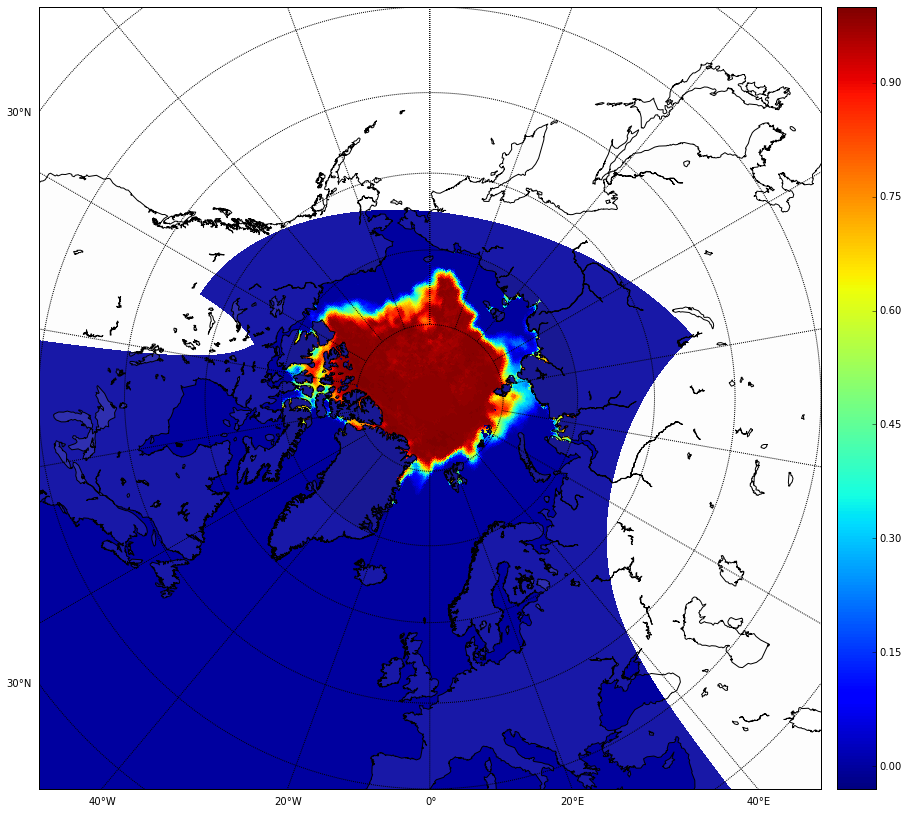

In [32]:
fig = plt.figure(figsize=(15,15))
m = Basemap(projection='npstere',boundinglat=40,lon_0=0,resolution='l')

x_lon,y_lat = m(nav_lon,nav_lat)
m.drawcoastlines()

m.fillcontinents(color = '0.95',alpha=0.1)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])

m.pcolor(x_lon[:,:],y_lat[:,:],icon_ANHA)
m.colorbar()

plt.show()